In [22]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
from expectation.conformal.conformal import ConformalEValue, ConformalEPseudomartingale, TruncatedEPseudomartingale

In [ ]:
def generate_change_point_data(n_pre: int = 1000, 
                             n_post: int = 1000, 
                             pre_mean: float = 0.0,
                             post_mean: float = 0.5,
                             std: float = 1.0) -> Tuple[np.ndarray, int]:
    """
    
    Generate synthetic data with a change point
    
    """
    pre_data = np.random.normal(pre_mean, std, n_pre)
    post_data = np.random.normal(post_mean, std, n_post)
    data = np.concatenate([pre_data, post_data])
    change_point = n_pre
    return data, change_point

# Example 1: Basic E-Value Computation
def example_basic_e_values(n_pre: int = 1000, n_post: int = 1000):
    print("\nExample 1: Basic E-Value Computation")
    
    # Generate some data
    np.random.seed(42)
    data, change_point = generate_change_point_data(n_pre=n_pre, n_post=n_post)
    
    # Initialize conformal e-value calculator
    e_calculator = ConformalEValue()
    
    # Process data in batches
    batch_size = 10
    e_values = []
    
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        e_value = e_calculator.update(batch)
        e_values.append(e_value)
        print(f"Batch {i//batch_size + 1} e-value: {e_value:.4f}")
    
    return np.array(e_values)

# Example 2: E-Pseudomartingale with Change Point Detection
def example_change_detection():
    print("\nExample 2: Change Point Detection")
    
    # Generate data with change point
    data, change_point = generate_change_point_data()
    
    # Initialize e-value calculator and pseudomartingale
    e_calculator = ConformalEValue()
    e_martingale = ConformalEPseudomartingale()
    
    # Process data and track capital
    threshold = 20  # Detection threshold
    detection_time = None
    capitals = []
    
    for i in range(0, len(data), 10):
        # Get batch and compute e-value
        batch = data[i:i+10]
        e_value = e_calculator.update(batch)
        
        # Update martingale
        capital, max_capital = e_martingale.update(e_value)
        capitals.append(capital)
        
        # Check for change point
        if capital >= threshold and detection_time is None:
            detection_time = i
            print(f"Change detected at step {i} (true change point: {change_point})")
    
    return np.array(capitals), detection_time, change_point

# Example 3: Truncated Martingale Comparison
def example_truncated_comparison(n: int = 1000):
    print("\nExample 3: Truncated vs Regular Martingale")
    
    # Generate challenging data
    data = np.random.normal(0, 1, n)  # Add some outliers
    data[50:70] += 3  # Create a temporary shift
    
    # Initialize both types
    e_calculator = ConformalEValue()
    regular_mart = ConformalEPseudomartingale()
    truncated_mart = TruncatedEPseudomartingale(min_capital=0.1)
    
    regular_caps = []
    truncated_caps = []
    
    # Process data
    for i in range(0, len(data), 5):
        batch = data[i:i+5]
        e_value = e_calculator.update(batch)
        
        reg_cap, _ = regular_mart.update(e_value)
        trunc_cap, _ = truncated_mart.update(e_value)
        
        regular_caps.append(reg_cap)
        truncated_caps.append(trunc_cap)
    
    return np.array(regular_caps), np.array(truncated_caps)

def plot_results(e_values, capitals, detection_time, change_point, 
                regular_caps, truncated_caps):
    """
    
    Plot results from all examples.
    
    """
    plt.figure(figsize=(15, 10))
    
    # Plot 1: E-values
    plt.subplot(3, 1, 1)
    plt.plot(e_values, label='E-values')
    plt.title('Conformal E-values')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Change Detection
    plt.subplot(3, 1, 2)
    plt.plot(capitals, label='Martingale Capital')
    if detection_time is not None:
        plt.axvline(x=detection_time/10, color='r', linestyle='--', 
                   label='Detected Change')
    plt.axvline(x=change_point/10, color='g', linestyle='--', 
                label='True Change Point')
    plt.title('Change Point Detection')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Truncated Comparison
    plt.subplot(3, 1, 3)
    plt.plot(regular_caps, label='Regular')
    plt.plot(truncated_caps, label='Truncated')
    plt.title('Regular vs Truncated Martingale')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


Example 1: Basic E-Value Computation
Batch 1 e-value: 0.1000
Batch 2 e-value: 0.0910
Batch 3 e-value: 0.0885
Batch 4 e-value: 0.0908
Batch 5 e-value: 0.0879
Batch 6 e-value: 0.0866
Batch 7 e-value: 0.0879
Batch 8 e-value: 0.0904
Batch 9 e-value: 0.0861
Batch 10 e-value: 0.0826
Batch 11 e-value: 0.0856
Batch 12 e-value: 0.0890
Batch 13 e-value: 0.0904
Batch 14 e-value: 0.0898
Batch 15 e-value: 0.0886
Batch 16 e-value: 0.0870
Batch 17 e-value: 0.0898
Batch 18 e-value: 0.0885
Batch 19 e-value: 0.0873
Batch 20 e-value: 0.0848
Batch 21 e-value: 0.0915
Batch 22 e-value: 0.0856
Batch 23 e-value: 0.0914
Batch 24 e-value: 0.0891
Batch 25 e-value: 0.0877
Batch 26 e-value: 0.0913
Batch 27 e-value: 0.0912
Batch 28 e-value: 0.0871
Batch 29 e-value: 0.0903
Batch 30 e-value: 0.0854
Batch 31 e-value: 0.0846
Batch 32 e-value: 0.0851
Batch 33 e-value: 0.0900
Batch 34 e-value: 0.0831
Batch 35 e-value: 0.0863
Batch 36 e-value: 0.0841
Batch 37 e-value: 0.0826
Batch 38 e-value: 0.0908
Batch 39 e-value: 0.0

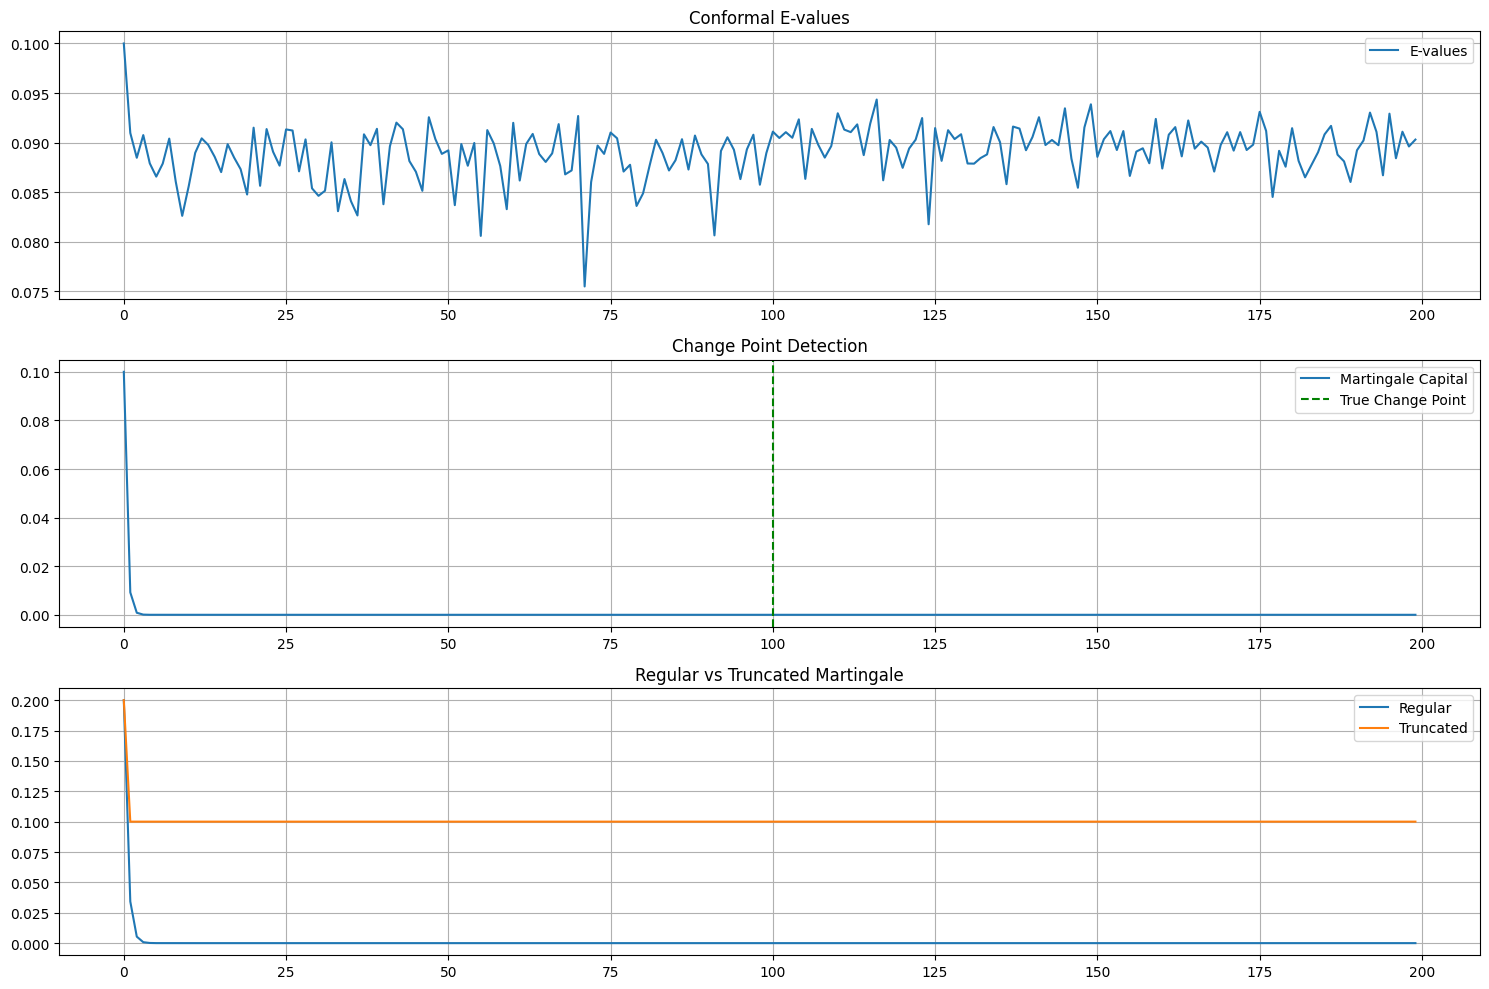

In [10]:
# Run all examples
e_values = example_basic_e_values()
capitals, detection_time, change_point = example_change_detection()
regular_caps, truncated_caps = example_truncated_comparison()

# Plot results
plot_results(e_values, capitals, detection_time, change_point, 
            regular_caps, truncated_caps)

In [ ]:
from expectation.conformal.cusum import ConformalCUSUM, EfficiencyAnalyzer

def run_cusum_comparison():
    """
    
    Compare standard CUSUM with SR modification.
    
    """
    # Generate data with change point
    np.random.seed(42)
    n_pre, n_post = 1000, 1000
    pre_data = np.random.normal(0, 1, n_pre)
    post_data = np.random.normal(0.5, 1, n_post)
    data = np.concatenate([pre_data, post_data])
    
    # Initialize detectors
    standard_cusum = ConformalCUSUM(threshold=20.0, use_sr=False)
    sr_cusum = ConformalCUSUM(threshold=20.0, use_sr=True)
    
    # Process data
    standard_stats = []
    sr_stats = []
    
    for x in data:
        # Compute e-value (simplified for example)
        e_value = np.exp(-0.5 * (x - 0.5)**2 + 0.5 * x**2)
        
        # Update detectors
        standard_result = standard_cusum.update(e_value)
        sr_result = sr_cusum.update(e_value)
        
        standard_stats.append(standard_result.statistic)
        sr_stats.append(sr_result.statistic)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(standard_stats, label='Standard CUSUM')
    plt.axvline(x=n_pre, color='r', linestyle='--', label='Change Point')
    for alarm in standard_result.alarms:
        plt.axvline(x=alarm, color='g', linestyle=':', alpha=0.5)
    plt.title('Standard CUSUM')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(sr_stats, label='SR-CUSUM')
    plt.axvline(x=n_pre, color='r', linestyle='--', label='Change Point')
    for alarm in sr_result.alarms:
        plt.axvline(x=alarm, color='g', linestyle=':', alpha=0.5)
    plt.title('Shiryaev-Roberts CUSUM')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Analyze efficiency
    analyzer = EfficiencyAnalyzer()
    standard_metrics = analyzer.compute_efficiency_metrics(standard_cusum)
    sr_metrics = analyzer.compute_efficiency_metrics(sr_cusum)
    
    print("\nEfficiency Metrics:")
    print("\nStandard CUSUM:")
    for metric, value in standard_metrics.items():
        print(f"{metric}: {value:.4f}")
        
    print("\nShiryaev-Roberts CUSUM:")
    for metric, value in sr_metrics.items():
        print(f"{metric}: {value:.4f}")

## Below seems to confirm Vovk's Example 7

"

Example 7. Consider the vacuous admissible conformal e-predictor identically equal to 1. <br>

The CUSUM procedure based on it will never raise alarms, while the Shiryaev–Roberts e-procedure will raise alarms every ⌈c⌉th step, <br>
thereby fully exploiting (for an integer c) the leeway permitted by our target property of validity (8). <br>
This example shows one feature of the Shiryaev–Roberts procedure (shared by the reverse Shiryaev–Roberts procedure) that can be considered its <br> disadvantage: while the CUSUM procedure raises an alarm when it has genuine evidence for disorder, the Shiryaev–Roberts procedure may raise an alarm <br> simply because it is allowed to do so by a given constraint; we might not have any evidence for disorder

"

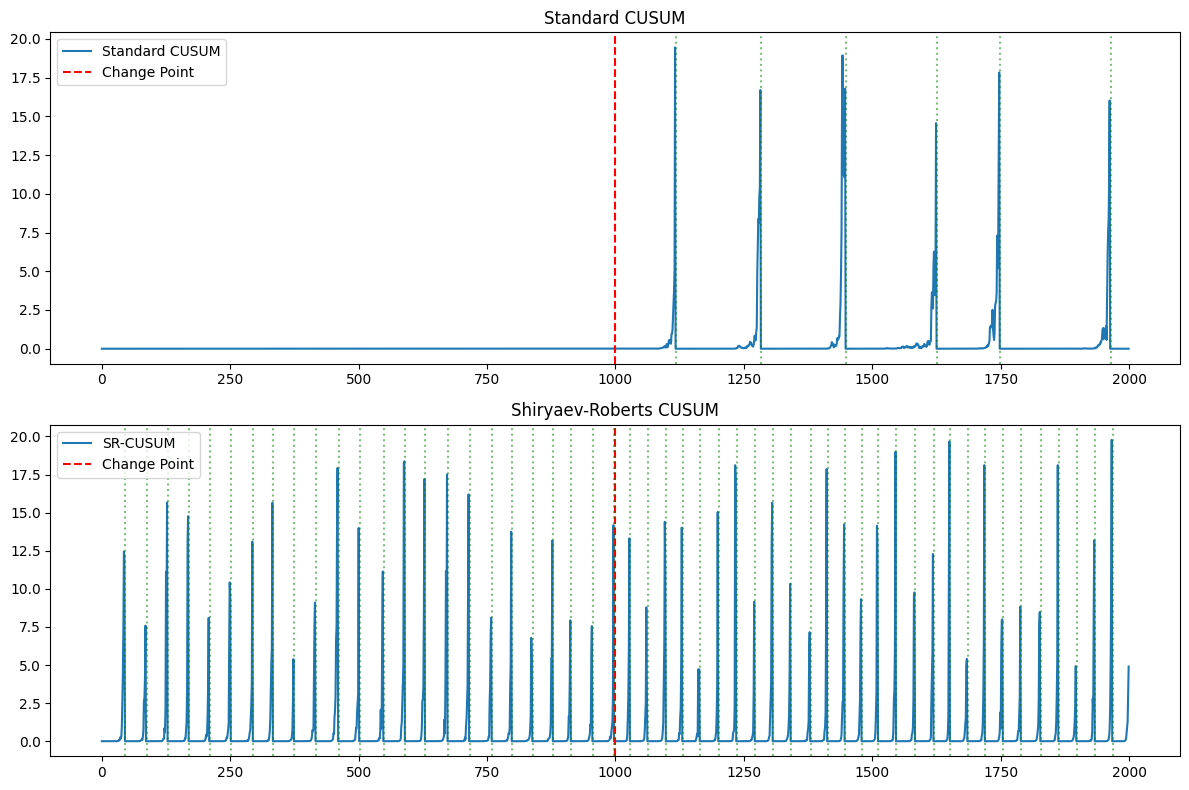


Efficiency Metrics:

Standard CUSUM:
mean_detection_delay: 198.3500
detection_delay_std: 59.4250
false_alarm_rate: 0.0000
mean_decay_rate: -0.0000
decay_rate_std: 0.0006

Shiryaev-Roberts CUSUM:
mean_detection_delay: 16.4300
detection_delay_std: 11.0619
false_alarm_rate: 974.6100
mean_decay_rate: 0.0001
decay_rate_std: 0.0007


In [21]:
run_cusum_comparison()